# VaR - Value at Risk

Este notebook tem como objetivo disponibilizar um exemplo de como podemos calcular o VaR. Lembramos que o VaR pode ser definido como número que satisfaz a seguinte equação:

$$ \mathbb{P}[ r \leq \text{VaR}_{\lambda}] = 1-\lambda$$

Começamos importanto algumas bibliotecas que serão utilizadas.

In [37]:
import numpy as np
import pandas as pd
import yfinance as yf
from statistics import NormalDist

Agora, utilizaremos a biblioteca yfinance para realizar o download dos preços EOD de PETR4.

[*********************100%***********************]  1 of 1 completed
23.700000762939453


<Axes: xlabel='Date'>

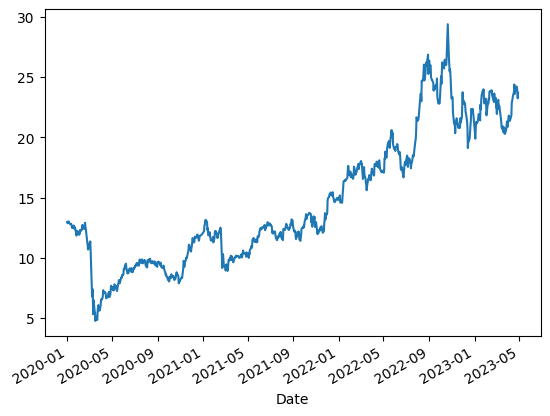

In [29]:
# Read data
asset = yf.download("PETR4.SA", start="2020-01-01", end="2023-05-01")
asset_close_prices = asset["Adj Close"]

last_close_price = asset_close_prices[-1]
print(last_close_price)

asset_close_prices.plot()

O passo seguinte é calcularmos os retornos diários do ativo e seu desvio padrão sobre um janela de 12 períodos(dias).

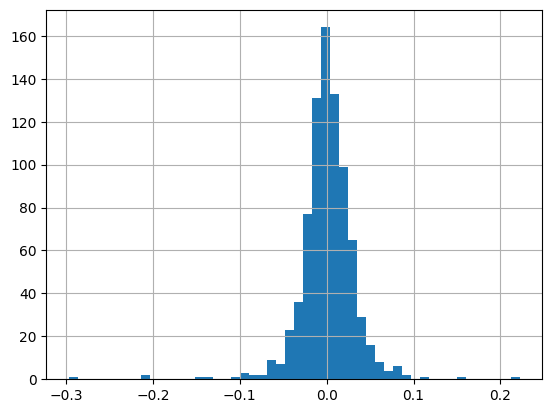

In [49]:
# Calculate daily returns
asset_returns = asset_close_prices.pct_change().dropna()
asset_returns.hist(bins=50)


asset_returns_mean = asset_returns.mean()
asset_returns_std = asset_returns.rolling(21).std()[-1]

## Delta Normal VaR

Sob as hipotéses Delta Normais podemos calcular o VaR a partir da seguitne equação:

$$\text{VaR} = P \times Z_{1-\lambda} \times \sigma$$

In [51]:
VaR = last_close_price * NormalDist().inv_cdf(0.05) * asset_returns_std
print(VaR)

-0.8047683149242512


## Historical VaR

No método histórico o VaR pode ser calculado ordenando os dados e tomando o quantil correspondente ao nível de tolerância. Mais precisamente:

In [52]:
# Calculate 95% VaR
var_95 = asset_returns[-21:-1].quantile(0.05)
print(var_95)

-0.02469053870263874


## Hybrid VaR